## Chapter 5: Excercise 5.10

Derive an expression for $\text{Var}\left(\hat{f}_{\lambda}(x_0) \right)$ and $\text{bias} \left (\hat{f}_{\lambda}(x_0) \right)$. Using the example (5.22), create a version of Figure 3.9 where the mean and several (pointwise) quantiles of $\hat{f}_{\lambda}(x)$ are shown

#### Solution

From (5.12) $\hat{\theta} = \left (\pmb{N}^{T} \pmb{N} + \lambda \pmb{\Omega}_{N} \right)^{-1} \pmb{N}^{T} \pmb{y} = \pmb{N}^{-1} \pmb{S}_{\lambda} \pmb{y}$ and $\hat{\pmb{f}} = \pmb{S}_{\lambda} \pmb{y}$. Decomposing the first row of $\pmb{N}$: $N(x_0) = [N_1(x_0), N_2(x_0), \dots, N_N(x_0)]$ then $\hat{f}_{\lambda}(x_0) = N(x_0)^T \hat{\theta}$.

The expected value $\mathbb{E}\left[\pmb{y}\right] = \pmb{f}$ Thus: $\text{bias} \left (\hat{f}_{\lambda}(x_0) \right) = y_0 - \mathbb{E} \left [N(x_0)^T \hat{\theta}\right] = y_0 - N(x_0)^T \pmb{N}^{-1} \pmb{S}_{\lambda} y_0$

The variance of $\pmb{y} = \pmb{I} \sigma^2$, and $\text{Var}\left( \pmb{\hat{f}} \right) = \pmb{S}_{\lambda} \sigma^2 \pmb{S}_{\lambda}^{T}$. Thus: $\text{Var}\left(N(x_0)^T \pmb{N}^{-1} \pmb{S}_{\lambda} y_0 \right) = N(x_0)^T \pmb{N}^{-1} \pmb{S}_{\lambda} \left( N(x_0)^T \pmb{N}^{-1} \pmb{S}_{\lambda} \right)^T\sigma^2$

----

### Replica of Figure 5.9

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import functions_section_5 as fs5

np.random.seed(1)
X = np.sort(np.random.uniform(0, 1, 50))
e = np.random.normal(0, 1, 50)
Y = np.sin(12*(X + 0.2))/(X + 0.2) + e

X_real = np.sort(np.random.uniform(0, 1, 1000))
Y_real = np.sin(12*(X_real + 0.2))/(X_real + 0.2)

#### Fit the natural cubic spline

In [71]:
natural_cubic_spline = fs5.natural_cubic_spline_base(X)
N = natural_cubic_spline.generate_basis_matrix(X)
omega = natural_cubic_spline.generate_omega_matrix(X)
beta_estimated = natural_cubic_spline.estimate_betas(Y, df=9)

#### Generate Figure

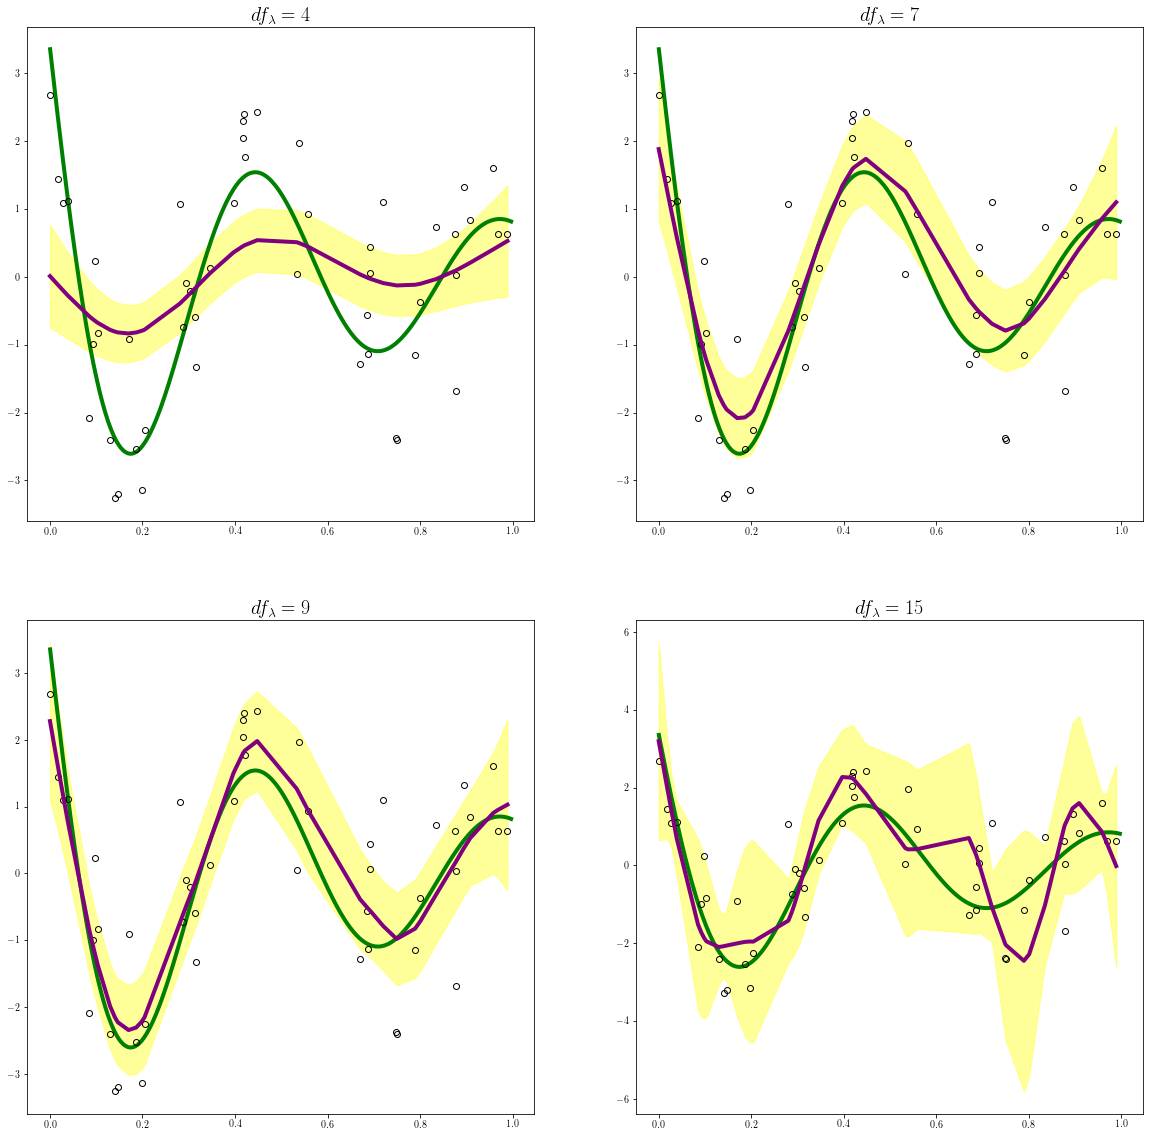

In [135]:
def generate_graph(ax, df):
    res = minimize(get_lambda, 0.001, args=(df), method = 'Nelder-Mead').x
    beta_estimated = np.linalg.inv(N.T@N + res * omega) @ N.T @ Y
    Y_hat = np.dot(N, beta_estimated).reshape(-1)

    S = N @ np.linalg.inv(N.T@N + res * omega) @ N.T
    covariance = S @ S.T
    stdes = np.sqrt(np.diag(covariance))

    Y_1 = Y_hat + 2 * stdes
    Y_2 = Y_hat - 2 * stdes

    ax.plot(X_real, Y_real, color='green', linewidth=4)
    ax.plot(X, Y, linestyle='', marker='o', fillstyle='none', color='black');
    ax.plot(X, Y_hat, color='purple', linewidth=4);
    ax.set_title(r'$df_{\lambda} =' + str(df) + '$', fontsize=20)
    ax.fill_between(X, Y_1, Y_2, color='yellow', alpha=0.4)
    
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
plt.rc('text', usetex=True)

generate_graph(axs[0,0], 4)
generate_graph(axs[0,1], 7)
generate_graph(axs[1,0], 9)
generate_graph(axs[1,1], 15)